<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/01_Getting_Started.ipynb)

# Chapter 1 - An Introduction to PyTorch

## Verifying Your PyTorch Setup

**Step 1: Install and Import Required Libraries**

In [48]:
import torch
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms, models
print(torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu121
False


## A Fun Example

**Step 2: Download and Load the Image**

In [46]:
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Panthera_tigris_altaica_13_-_Buffalo_Zoo.jpg/640px-Panthera_tigris_altaica_13_-_Buffalo_Zoo.jpg'
fpath = 'tiger.jpg'
urllib.request.urlretrieve(url, fpath)

('tiger.jpg', <http.client.HTTPMessage at 0x781cd2a7b410>)

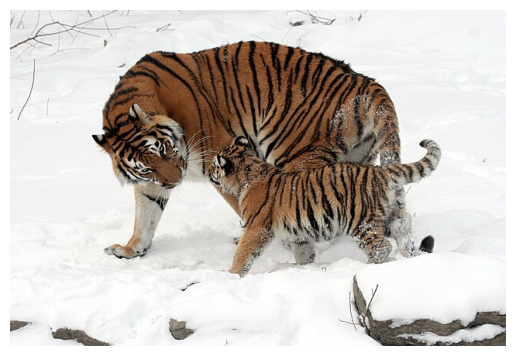

In [47]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("tiger.jpg")
plt.imshow(img)
plt.axis("off")  # Hide axes for better visualization
plt.show()

**Step 3: Define Transform Variations**

Cell A: Full Transform

In [58]:
import torch
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])
img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


Cell B: Remove Resizing & Cropping

In [52]:
transformB = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])
img_tensorB = transformB(img)

# Print shape to confirm
print("New Tensor Shape:", img_tensorB.shape)


New Tensor Shape: torch.Size([3, 434, 640])


Cell C: Remove Normalization


In [55]:
transformC = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

img_tensorC = transformC(img)
print(type(img_tensorC), img_tensorC.shape)


<class 'torch.Tensor'> torch.Size([3, 224, 224])


Cell D: Remove ToTensor

In [54]:
transformD = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

try:
    img_tensorD = transformD(img)
except Exception as e:
    print("Error:", e)


Error: img should be Tensor Image. Got <class 'PIL.Image.Image'>


**Step 4: Create Batches for Each Version**

In [57]:
batch = torch.unsqueeze(img_tensor, 0)
batchB = torch.unsqueeze(img_tensorB, 0)
batchC = torch.unsqueeze(img_tensorC, 0)

print(batch.shape)
print(batchB.shape)
print(batchC.shape)


torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 434, 640])
torch.Size([1, 3, 224, 224])


**Step 5: Load and Run the AlexNet Model**

In [59]:
model = models.alexnet(pretrained=True)
device = "cuda" if torch.cuda.is_available() else "cpu"

model.eval()
model.to(device)
y = model(batch.to(device))

print(y.shape)

torch.Size([1, 1000])


 **Step 6: Get Predictions**

In [40]:
y_max, index = torch.max(y, 1)
print(index, y_max)

# Load ImageNet labels
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open(fpath) as f:
    classes = [line.strip() for line in f.readlines()]

print(classes[index])

tensor([292]) tensor([25.8128], grad_fn=<MaxBackward0>)
292: 'tiger, Panthera tigris',


**Step 7: Top 5 Predictions**

In [41]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

292: 'tiger, Panthera tigris', 99.57881927490234
282: 'tiger cat', 0.42017605900764465
51: 'triceratops', 0.0007655104855075479
342: 'wild boar, boar, Sus scrofa', 9.917780698742718e-05
285: 'Egyptian cat', 1.803889790608082e-05


**Step 8: Load and Run VGG16**

In [42]:
model = models.vgg16(pretrained=True)
model.eval()
model.to(device)
y = model(batch.to(device))

y_max, index = torch.max(y, 1)
print(classes[index])

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 73.5MB/s]


292: 'tiger, Panthera tigris',
292: 'tiger, Panthera tigris', 92.06288146972656
282: 'tiger cat', 7.898439407348633
281: 'tabby, tabby cat', 0.011355732567608356
287: 'lynx, catamount', 0.008924639783799648
340: 'zebra', 0.006469203159213066


**Step 9: Compare Model Parameters**

In [49]:
!pip install torchinfo


In [50]:
from torchinfo import summary

print("AlexNet Parameters:")
summary(models.alexnet(pretrained=True), input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

print("\nVGG16 Parameters:")
summary(models.vgg16(pretrained=True), input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))


AlexNet Parameters:


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



VGG16 Parameters:


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 1000]                --
+ Sequential: 1-1                        [16, 512, 7, 7]           --
|    + Conv2d: 2-1                       [16, 64, 224, 224]        1,792
|    + ReLU: 2-2                         [16, 64, 224, 224]        --
|    + Conv2d: 2-3                       [16, 64, 224, 224]        36,928
|    + ReLU: 2-4                         [16, 64, 224, 224]        --
|    + MaxPool2d: 2-5                    [16, 64, 112, 112]        --
|    + Conv2d: 2-6                       [16, 128, 112, 112]       73,856
|    + ReLU: 2-7                         [16, 128, 112, 112]       --
|    + Conv2d: 2-8                       [16, 128, 112, 112]       147,584
|    + ReLU: 2-9                         [16, 128, 112, 112]       --
|    + MaxPool2d: 2-10                   [16, 128, 56, 56]         --
|    + Conv2d: 2-11                      [16, 256, 56, 56]         29